# Fourier transform  

We're first going to look into fourier transform, and it's utility, then we're going to think about its limitations and see how we can improve on it to build an intersting model. First we consider the characterstic function $\phi _X(u) = E[e^{iuX}] = \int _\mathbb{R} e^{iux}f_x(x)dx$, where $f_X$ is the density of $X$. Note that this integral is the same as the defintion of the fourier transform (https://en.wikipedia.org/wiki/Fourier_transform). So given that we know the *characterstic function* we can use the inverse fourier transform to get the density function. Another very intersting result given the inversion theorem is that we can express the CDF in this cool way! 

$F_X(x) = \frac{1}{2} - \frac{1}{\pi}\int _\mathbb{R} \frac{e^{iux}\phi _X(u)}{iu}$, then we can diffirentiate $F_x(x)$ and get $f$. This is called Gil–Pelaez formula, and I'll not take the time to prove it here, it's possible to just google it. The reason we do this is because it's way numericaly nicer than directly integrating $f_X$. Thus we can compute probabilities, quantiles etc only knowing the characterstic function! 


Let's further look into the option pricing in the frequency domain. Observed the discounted European call price: $ C(S_0, K, T) = e^{-rT}E[(S_T-K)^+] = e^{-rT}\int _\mathbb{R}(S_0e^x-K)^+ f_{X_T}(x)$, with maturity T and strike K. We can replace $f_{X_T}$ by its inverse fourier and get that the pricing is an integral of the characterstic function. 


Here is a list of these functions, https://en.wikipedia.org/wiki/Characteristic_function_(probability_theory). Im going to expirement and get a feel for it. 

In [29]:
from scipy.integrate import quad
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.stats as ss 

In [30]:
# define some Characterstic fucntions 

def cf_norm(u, mu=1, sigma=2): return np.exp( 1j * u * mu - 0.5 * u**2 * sigma**2 )
def cf_gamma(u, a=1, b=1): return (1 - b * u * 1j)**(-a) 
def cf_poisson(u, lam= 1):  return np.exp( lam * (np.exp(1j * u) -1) ) 


In [31]:
# Given the definions above, we can try to compute the PDF, and since they're already known for these distr. we can test how well it works! 

def GP_pdf(x, CF, lim): 
    integrand = lambda u: np.real( np.exp(-u*x*1j) * CF(u))
    return 1/np.pi * quad(integrand, 1e-15, lim)[0]

# Testing

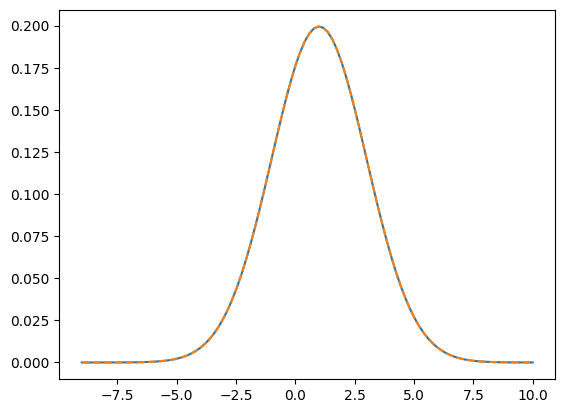

In [ ]:
x = np.linspace(-10,10,100)
plt.plot(x,ss.norm.pdf(x, loc=1, scale=2), label="pdf norm") # scipy normal distr

vals = [GP_pdf(j,cf_norm, np.inf) for j in x]
plt.plot(x, vals,label="computed norm by fourier inverse", linestyle='dashed' )
plt.show()



So it seems that it works really well! I'll do the rest just to see if it works better or worse. 